<a href="https://colab.research.google.com/github/samikshagadhave/binary_classification/blob/main/binary_classification_with_mobilenet_on_T51%26T52%26T53%26T54.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
%cd /content/gdrive

/content/gdrive


In [ ]:
import pandas as pd

df=pd.read_excel(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD/Train 1.xlsx')

df['OR_Gate']=df['Tower']|df['Transmission line']|df['insulator']|df['vibration damper']
#print(df['OR_Gate'])

Bad_dataset=list(df[df['OR_Gate']==0]["Image Name"])
#print(Bad_dataset)

Good_dataset=list(df[df['OR_Gate']==1]["Image Name"])
#print(Good_dataset)
path=r"/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD/train/"

img_path_Bad_dataset=r"/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD/Train/bad_dataset/"

img_path_Good_dataset =r"/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD/Train/good_dataset/"
import shutil
for i in Bad_dataset:
   src_path=path+i
   #print(src_path)
   dest_path=img_path_Bad_dataset+i
   #print(dest_path)
   temp=shutil.copy(src_path,dest_path)
   #print(temp)
   print("bad_dataset folder created and relevant images have been moved")
for i in Good_dataset:
   src_path=path+i
   #print(src_path)
   dest_path=img_path_Good_dataset+i
   #print(dest_path)
   temp=shutil.copy(src_path, dest_path)
   print("good_dataset folder created and relevant images have been moved")


df=pd.read_excel(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD/Test 1.xlsx')

df['OR_Gate']=df['Tower']|df['Transmission line']|df['insulator']|df['vibration damper']
#print(df['OR_Gate'])

Bad_dataset=list(df[df['OR_Gate']==0]["Image Name"])
Good_dataset=list(df[df['OR_Gate']==1]["Image Name"])
#print(Good_dataset)
path=r"/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD/test/"

img_path_Bad_dataset=r"/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD/Test/bad_dataset/"
img_path_Good_dataset =r"/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD/Test/good_dataset/"
import shutil
for i in Bad_dataset:
   src_path=path+i
   #print(src_path)
   dest_path=img_path_Bad_dataset+i
   #print(dest_path)
   temp=shutil.copy(src_path,dest_path)
   #print(temp)
   print("bad_dataset folder created and relevant images have been moved")
for i in Good_dataset:
   src_path=path+i
   #print(src_path)
   dest_path=img_path_Good_dataset+i
   #print(dest_path)
   temp=shutil.copy(src_path, dest_path)
   print("good_dataset folder created and relevant images have been moved")


bad_dataset folder created and relevant images have been moved
bad_dataset folder created and relevant images have been moved
bad_dataset folder created and relevant images have been moved
bad_dataset folder created and relevant images have been moved
bad_dataset folder created and relevant images have been moved
bad_dataset folder created and relevant images have been moved
bad_dataset folder created and relevant images have been moved
bad_dataset folder created and relevant images have been moved
bad_dataset folder created and relevant images have been moved
bad_dataset folder created and relevant images have been moved
bad_dataset folder created and relevant images have been moved
bad_dataset folder created and relevant images have been moved
bad_dataset folder created and relevant images have been moved
bad_dataset folder created and relevant images have been moved
bad_dataset folder created and relevant images have been moved
bad_dataset folder created and relevant images have bee

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten,Dropout,Conv2D,GlobalAveragePooling2D
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt

train_ds=keras.utils.image_dataset_from_directory(
    directory=r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD/Train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(128,128)
)
validation_ds=keras.utils.image_dataset_from_directory(
    directory=r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD/Test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(128,128)
)

print(train_ds)
print(validation_ds)


Found 191 files belonging to 2 classes.
Found 82 files belonging to 2 classes.
<_BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<_BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [ ]:
from tensorflow.keras.applications import MobileNetV2
model=MobileNetV2(include_top=False,input_shape=(128,128,3),pooling='avg',weights='imagenet')
my_model=Sequential([model,

                     Dense(512,activation='relu'),
                     Dropout(0.2),
                     Dense(1,activation='sigmoid'),
                     ])

my_model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_128 (Funct  (None, 1280)             2257984   
 ional)                                                          
                                                                 
 dense (Dense)               (None, 512)               655872    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 513       
                                                                 
Total params: 2,914,369
Trainable params: 2,880,257
Non-trainable params: 34,112
_________________________________________________________________


In [ ]:
train_ds=train_ds.prefetch(tf.data.AUTOTUNE)
train_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
validation_ds=validation_ds.prefetch(tf.data.AUTOTUNE)
validation_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras import metrics
metrics=['accuracy']
model.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate=0.001),metrics=metrics)

In [ ]:
history=model.fit(train_ds,epochs=30,validation_data=validation_ds)

Epoch 1/30
6/6 [==============================] - 62s 3s/step - loss: 5.2188 - accuracy: 0.0052 - val_loss: 9.0432 - val_accuracy: 0.0000e+00
Epoch 2/30
6/6 [==============================] - 19s 1s/step - loss: 4.4077 - accuracy: 0.0000e+00 - val_loss: 9.4203 - val_accuracy: 0.0000e+00
Epoch 3/30
6/6 [==============================] - 24s 2s/step - loss: 3.7979 - accuracy: 0.0000e+00 - val_loss: 9.7768 - val_accuracy: 0.0000e+00
Epoch 4/30
6/6 [==============================] - 24s 1s/step - loss: 3.1798 - accuracy: 0.0000e+00 - val_loss: 10.1543 - val_accuracy: 0.0000e+00
Epoch 5/30
6/6 [==============================] - 24s 2s/step - loss: 2.3332 - accuracy: 0.0000e+00 - val_loss: 10.4049 - val_accuracy: 0.0000e+00
Epoch 6/30
6/6 [==============================] - 19s 1s/step - loss: 1.6547 - accuracy: 0.0000e+00 - val_loss: 9.8940 - val_accuracy: 0.0000e+00
Epoch 7/30
6/6 [==============================] - 21s 1s/step - loss: 1.3425 - accuracy: 0.0000e+00 - val_loss: 9.1898 - val_a

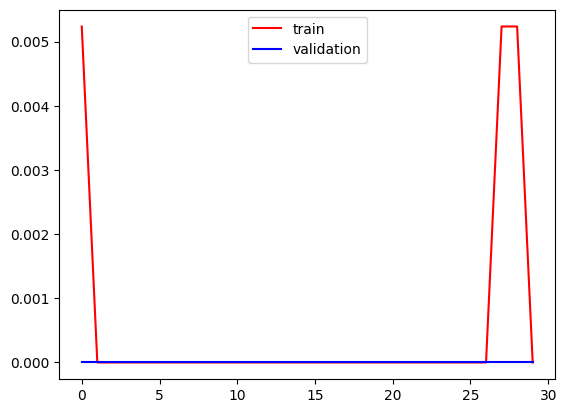

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

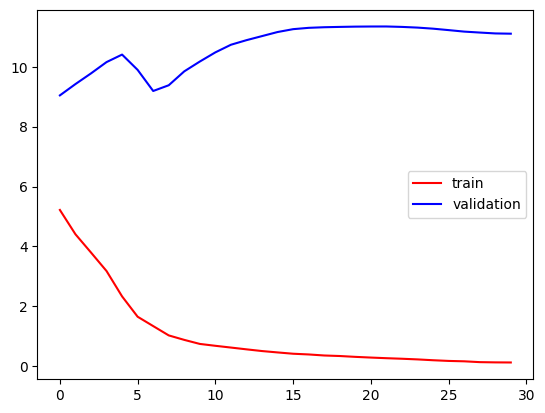

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD/Test/bad_dataset/DJI_0066.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 32ms/step
[[0.        0.        0.        ... 0.        4.7172513 0.       ]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD/Test/bad_dataset/DJI_0489.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)


1/1 [==============================] - 0s 23ms/step
[[0.       0.       0.       ... 0.       4.697802 0.      ]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD/Test/bad_dataset/DJI_0491.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 27ms/step
[[0.        0.        0.        ... 0.        4.6973667 0.       ]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD/Test/bad_dataset/DJI_0493.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 24ms/step
[[0.       0.       0.       ... 0.       4.634754 0.      ]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD/Test/bad_dataset/DJI_0495.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 23ms/step
[[0.        0.        0.        ... 0.        4.7304897 0.       ]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD/Test/bad_dataset/DJI_0497.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 29ms/step
[[0.       0.       0.       ... 0.       4.688527 0.      ]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD/Test/bad_dataset/DJI_0499.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 23ms/step
[[0.        0.        0.        ... 0.        4.6390853 0.       ]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD/Test/bad_dataset/DJI_0501.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 27ms/step
[[0.       0.       0.       ... 0.       4.797221 0.      ]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD/Test/bad_dataset/DJI_0503.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 23ms/step
[[0.        0.        0.        ... 0.        4.3274555 0.       ]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD/Test/bad_dataset/DJI_0505.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 29ms/step
[[0.        0.        0.        ... 0.        4.7085557 0.       ]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD/Test/bad_dataset/DJI_0507.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 28ms/step
[[0.        0.        0.        ... 0.        4.7496285 0.       ]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD/Test/bad_dataset/DJI_0509.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 38ms/step
[[0.        0.        0.        ... 0.        5.3668747 0.       ]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD/Test/bad_dataset/DJI_0976.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 24ms/step
[[0.        0.        0.        ... 0.        4.7504277 0.       ]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD/Test/bad_dataset/DJI_0978.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 23ms/step
[[0.       0.       0.       ... 0.       4.919549 0.      ]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD/Test/bad_dataset/DJI_0980.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 24ms/step
[[0.       0.       0.       ... 0.       5.033539 0.      ]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD/Test/bad_dataset/DJI_0982.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 24ms/step
[[0.        0.        0.        ... 0.        4.7572503 0.       ]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD/Test/bad_dataset/DJI_0984.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 23ms/step
[[0.        0.        0.        ... 0.        5.1376934 0.       ]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD/Test/bad_dataset/DJI_0986.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 30ms/step
[[0.        0.        0.        ... 0.        5.6173253 0.       ]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD/Test/good_dataset/DJI_0869.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 35ms/step
[[0.       0.       0.       ... 0.       4.870348 0.      ]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD/Test/good_dataset/DJI_0871.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 26ms/step
[[0.        0.        0.        ... 0.        4.7292795 0.       ]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD/Test/good_dataset/DJI_0873.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 23ms/step
[[0.       0.       0.       ... 0.       4.619981 0.      ]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD/Test/good_dataset/DJI_0875.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 23ms/step
[[0.       0.       0.       ... 0.       4.746073 0.      ]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD/Test/good_dataset/DJI_0877.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 25ms/step
[[0.        0.        0.        ... 0.        4.7903547 0.       ]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD/Test/good_dataset/DJI_0879.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 22ms/step
[[0.       0.       0.       ... 0.       4.391263 0.      ]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD/Test/good_dataset/DJI_0881.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 35ms/step
[[0.       0.       0.       ... 0.       4.289433 0.      ]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD/Test/good_dataset/DJI_0883.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 23ms/step
[[0.        0.        0.        ... 0.        4.8543835 0.       ]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD/Test/good_dataset/DJI_0885.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 24ms/step
[[0.      0.      0.      ... 0.      4.76245 0.     ]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD/Test/good_dataset/DJI_0887.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 38ms/step
[[0.        0.        0.        ... 0.        4.7189465 0.       ]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD/Test/good_dataset/DJI_0889.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 22ms/step
[[0.        0.        0.        ... 0.        4.6965265 0.       ]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD/Test/good_dataset/DJI_0891.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 23ms/step
[[0.        0.        0.        ... 0.        4.5985913 0.       ]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD/Test/good_dataset/DJI_0893.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 28ms/step
[[0.       0.       0.       ... 0.       4.785534 0.      ]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD/Test/good_dataset/DJI_0895.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 23ms/step
[[0.       0.       0.       ... 0.       4.677159 0.      ]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD/Test/good_dataset/DJI_0897.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 23ms/step
[[0.    0.    0.    ... 0.    4.813 0.   ]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD/Test/good_dataset/DJI_0899.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 24ms/step
[[0.       0.       0.       ... 0.       4.712628 0.      ]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD/Test/good_dataset/DJI_0901.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 23ms/step
[[0.        0.        0.        ... 0.        4.6427236 0.       ]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD/Test/good_dataset/DJI_0903.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 23ms/step
[[0.       0.       0.       ... 0.       4.668577 0.      ]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD/Test/good_dataset/DJI_0905.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 25ms/step
[[0.       0.       0.       ... 0.       4.833275 0.      ]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD/Test/good_dataset/DJI_0907.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 26ms/step
[[0.        0.        0.        ... 0.        4.9557004 0.       ]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD/Test/good_dataset/DJI_0909.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 23ms/step
[[0.        0.        0.        ... 0.        4.7299237 0.       ]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD/Test/good_dataset/DJI_0911.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 27ms/step
[[0.       0.       0.       ... 0.       4.748265 0.      ]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD/Test/good_dataset/DJI_0913.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 26ms/step
[[0.        0.        0.        ... 0.        4.8276024 0.       ]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD/Test/good_dataset/DJI_0915.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 22ms/step
[[0.        0.        0.        ... 0.        4.7324986 0.       ]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD/Test/good_dataset/DJI_0917.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 25ms/step
[[0.        0.        0.        ... 0.        4.7453246 0.       ]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD/Test/good_dataset/DJI_0919.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 45ms/step
[[0.        0.        0.        ... 0.        4.7510805 0.       ]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD/Test/good_dataset/DJI_0921.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 25ms/step
[[0.      0.      0.      ... 0.      4.76645 0.     ]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD/Test/good_dataset/DJI_0923.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 37ms/step
[[0.       0.       0.       ... 0.       4.753066 0.      ]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD/Test/good_dataset/DJI_0925.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 25ms/step
[[0.        0.        0.        ... 0.        4.7842703 0.       ]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD/Test/good_dataset/DJI_0927.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 22ms/step
[[0.       0.       0.       ... 0.       4.982724 0.      ]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD/Test/good_dataset/DJI_0929.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 24ms/step
[[0.        0.        0.        ... 0.        4.8775735 0.       ]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD/Test/good_dataset/DJI_0931.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 23ms/step
[[0.        0.        0.        ... 0.        4.7590237 0.       ]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD/Test/good_dataset/DJI_0933.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 23ms/step
[[0.       0.       0.       ... 0.       4.711358 0.      ]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD/Test/good_dataset/DJI_0935.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 36ms/step
[[0.       0.       0.       ... 0.       4.816512 0.      ]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD/Test/good_dataset/DJI_0937.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 23ms/step
[[0.        0.        0.        ... 0.        5.4431977 0.       ]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD/Test/good_dataset/DJI_0939.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 43ms/step
[[0.        0.        0.        ... 0.        4.7511225 0.       ]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD/Test/good_dataset/DJI_0941.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 22ms/step
[[0.       0.       0.       ... 0.       4.664874 0.      ]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD/Test/good_dataset/DJI_0943.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 22ms/step
[[0.        0.        0.        ... 0.        4.7189584 0.       ]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD/Test/good_dataset/DJI_0945.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 23ms/step
[[0.       0.       0.       ... 0.       4.800815 0.      ]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD/Test/good_dataset/DJI_0947.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 30ms/step
[[0.       0.       0.       ... 0.       4.978181 0.      ]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD/Test/good_dataset/DJI_0949.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 30ms/step
[[0.       0.       0.       ... 0.       5.080002 0.      ]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD/Test/good_dataset/DJI_0951.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 26ms/step
[[0.       0.       0.       ... 0.       5.193167 0.      ]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD/Test/good_dataset/DJI_0953.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 37ms/step
[[0.        0.        0.        ... 0.        5.2862816 0.       ]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD/Test/good_dataset/DJI_0955.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 27ms/step
[[0.       0.       0.       ... 0.       5.143283 0.      ]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD/Test/good_dataset/DJI_0957.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 25ms/step
[[0.       0.       0.       ... 0.       5.132703 0.      ]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD/Test/good_dataset/DJI_0959.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 34ms/step
[[0.        0.        0.        ... 0.        4.9558754 0.       ]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD/Test/good_dataset/DJI_0961.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 26ms/step
[[0.        0.        0.        ... 0.        4.8169603 0.       ]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD/Test/good_dataset/DJI_0963.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 23ms/step
[[0.       0.       0.       ... 0.       4.742015 0.      ]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD/Test/good_dataset/DJI_0965.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 26ms/step
[[0.        0.        0.        ... 0.        4.9092216 0.       ]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD/Test/good_dataset/DJI_0967.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 28ms/step
[[0.        0.        0.        ... 0.        4.7965355 0.       ]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD/Test/good_dataset/DJI_0969.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 23ms/step
[[0.       0.       0.       ... 0.       4.946515 0.      ]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD/Test/good_dataset/DJI_0971.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 24ms/step
[[0.        0.        0.        ... 0.        4.8804245 0.       ]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD/Test/good_dataset/DJI_0973.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 23ms/step
[[0.        0.        0.        ... 0.        4.7946672 0.       ]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD/Test/good_dataset/DJI_0975.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 22ms/step
[[0.       0.       0.       ... 0.       4.905726 0.      ]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD/Test/good_dataset/DJI_0977.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 33ms/step
[[0.       0.       0.       ... 0.       4.973693 0.      ]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD/Test/good_dataset/DJI_0979.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 22ms/step
[[0.      0.      0.      ... 0.      4.96601 0.     ]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD/Test/good_dataset/DJI_0981.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 38ms/step
[[0.      0.      0.      ... 0.      5.06108 0.     ]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD/Test/good_dataset/DJI_0983.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 25ms/step
[[0.       0.       0.       ... 0.       5.067629 0.      ]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD/Test/good_dataset/DJI_0985.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 24ms/step
[[0.        0.        0.        ... 0.        4.8321733 0.       ]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD/Test/good_dataset/DJI_0987.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 33ms/step
[[0.       0.       0.       ... 0.       4.814024 0.      ]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD/Test/good_dataset/DJI_0989.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 39ms/step
[[0.        0.        0.        ... 0.        4.7993264 0.       ]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD/Test/good_dataset/DJI_0991.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 24ms/step
[[0.       0.       0.       ... 0.       4.763401 0.      ]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD/Test/good_dataset/DJI_0993.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 29ms/step
[[0.       0.       0.       ... 0.       4.969332 0.      ]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD/Test/good_dataset/DJI_0995.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 33ms/step
[[0.       0.       0.       ... 0.       5.098462 0.      ]]


In [ ]:

from sklearn.metrics import classification_report,confusion_matrix
truth=['bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good']
prediction=['bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad']
print(classification_report(truth,prediction))
print(confusion_matrix(truth,prediction))

              precision    recall  f1-score   support

         bad       0.22      1.00      0.36        18
        good       0.00      0.00      0.00        64

    accuracy                           0.22        82
   macro avg       0.11      0.50      0.18        82
weighted avg       0.05      0.22      0.08        82

[[18  0]
 [64  0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
